<a href="https://colab.research.google.com/github/nik9hil/WorkingWithLIME/blob/master/SoldierCivilian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
from keras.utils import plot_model
import numpy as np 
import pandas as pd
from PIL import Image, ImageFilter
import os, random
from keras.models import Sequential
from keras.layers import Input, Dropout, Flatten, Convolution2D, MaxPooling2D, Dense, Activation
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')


TRAIN_DIR1 = '/content/drive/My Drive/Colab Notebooks/soldiers/train/'
TEST_DIR1 = '/content/drive/My Drive/Colab Notebooks/soldiers/test/'
TRAIN_DIR2 = '/content/drive/My Drive/Colab Notebooks/civil2/train/'
TEST_DIR2 = '/content/drive/My Drive/Colab Notebooks/civil2/test/'




ROWS = 224
COLS = 224

CHANNELS = 3
#print(os.listdir(TRAIN_DIR))
#print()
#print(os.listdir(TEST_DIR))
#print()
train_images1 = [TRAIN_DIR1 + i for i in os.listdir(TRAIN_DIR1)]
test_images1 = [TEST_DIR1 + i for i in os.listdir(TEST_DIR1)]
train_images2 = [TRAIN_DIR2 + i for i in os.listdir(TRAIN_DIR2)]
test_images2 = [TEST_DIR2 + i for i in os.listdir(TEST_DIR2)]


# #print(train_images)
#print()
#print(test_images)
#print()
def read_image(file_path):
    img = Image.open(file_path)
    im=img.convert("RGB")
    return im.resize((ROWS, COLS), Image.NEAREST)
    
def prep_data(images):
    count = len(images)
    data = np.ndarray((count, ROWS, COLS, CHANNELS), dtype = np.uint8)
    
    for i, image_file in enumerate(images):
        image = read_image(image_file)
        data[i]=image#.transpose(Image.FLIP_LEFT_RIGHT)

        if i % 1 == 0:
            print ('Processed {} of {}'.format(i, count))
            
    return data

train1 = prep_data(train_images1)  
train2 = prep_data(train_images2)


test1 = prep_data(test_images1)  
test2 = prep_data(test_images2)

#print("Train shape: {}".format(train.shape))
#print("Test shape:  {}".format(test.shape))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Processed 0 of 316
Processed 1 of 316
Processed 2 of 316
Processed 3 of 316
Processed 4 of 316
Processed 5 of 316
Processed 6 of 316
Processed 7 of 316
Processed 8 of 316
Processed 9 of 316
Processed 10 of 316
Processed 11 of 316
Processed 12 of 316
Processed 13 of 316
Processed 14 of 316
Processed 15 of 316
Processed 16 of 316
Processed 17 of 316
Processed 18 of 316
Processed 19 of 316
Processed 20 of 316
Processed 21 of 316
Processed 22 of 316
Processed 23 of 316
Processed 24 of 316
Processed 25 of 316
Processed 26 of 316
Processed 27 of 316
Processed 28 of 316
Processed 29 of 316
Processed 30 of 316
Processed 31 of 316
Processed 32 of 316
Processed 33 of 316
Processed 34 of 316
Processed 35 of 316
Processed 36 of 316
Processed 37 of 316
Processed 38 of 316
Processed 39 of 316
Processed 40 of 316
Processed 41 of 316
Processed 42 of 316
Processed 43 of 316
P

In [0]:
labels = []

for i in train_images1:
    labels.append(1)
for i in train_images2:
    labels.append(0)
        
train = np.vstack((train1,train2))
test = np.vstack((test1,test2))
        
train = train.reshape(-1,224,224,3)
test = test.reshape(-1,224, 224, 3)
X_train = train.astype('float32')
X_test = test.astype('float32')
X_train /= 255.0
X_test /= 255.0
Y_train = labels
X_train=np.array(X_train)
#print(X_train)
X_test=np.array(X_test)
Y_train=np.array(Y_train)
print(Y_train)
labels_test = []
for i in test_images1:
    labels_test.append(1)
for i in test_images2:
    labels_test.append(0)
Y_test = labels_test
Y_test = np.array(Y_test)
print(Y_test)

#TRY THIS
#plt.show()

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

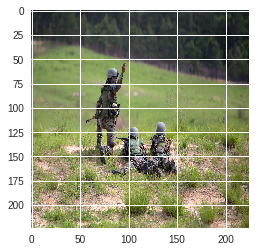

In [0]:
plt.imshow(X_train[200])

In [0]:
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image
model = VGG16(weights='imagenet', include_top=False)
# vgg_model = VGG16(weights='imagenet', include_top=False)
# type(vgg_model)

58892288/58889256 [==============================] - 2s 0us/step


In [0]:
print("Training matrix shape ", X_train.shape) #  m X features
print("Testing matrix shape  ", X_test.shape) #  m X features

Training matrix shape  (632, 224, 224, 3)
Testing matrix shape   (140, 224, 224, 3)


In [0]:
features_x=model.predict(X_train)
print(features_x.shape)
X_train = features_x.reshape(632,25088)
print(X_train.shape)

(632, 7, 7, 512)
(632, 25088)


In [0]:
features_xtest=model.predict(X_test)
print(features_xtest.shape)
X_test=features_xtest.reshape(140,25088)
print(X_test.shape)

(140, 7, 7, 512)
(140, 25088)


In [0]:
model=Sequential()

model.add(Dense(4096, input_dim=25088, activation='relu',kernel_initializer='glorot_uniform'))
keras.layers.core.Dropout(0.3, noise_shape=None, seed=None)
model.add(keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None))

model.add(Dense(1024,input_dim=4096,activation='relu'))
keras.layers.core.Dropout(0.4, noise_shape=None, seed=None)

model.add(Dense(512,input_dim=1024,activation='relu'))
keras.layers.core.Dropout(0.2, noise_shape=None, seed=None)

model.add(Dense(128,input_dim=512,activation='relu'))
keras.layers.core.Dropout(0.2, noise_shape=None, seed=None)
sgd = keras.optimizers.SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)

model.add(Dense(1,input_dim=128,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# fitting the model 

model.fit(X_train, Y_train, epochs=5)

Epoch 1/5
632/632 [==============================] - 5s 8ms/step - loss: 0.7526 - acc: 0.8766
Epoch 2/5
632/632 [==============================] - 2s 4ms/step - loss: 0.0608 - acc: 0.9810
Epoch 3/5
632/632 [==============================] - 2s 3ms/step - loss: 0.0717 - acc: 0.9826
Epoch 4/5
632/632 [==============================] - 2s 4ms/step - loss: 0.0427 - acc: 0.9889
Epoch 5/5
632/632 [==============================] - 2s 3ms/step - loss: 0.0646 - acc: 0.9794


In [0]:
from sklearn.metrics import log_loss
pred = model.predict(X_test, batch_size=32, verbose=0)
print(pred)
print(model.evaluate(X_test,Y_test))

In [0]:
!pip install lime
import lime

    100% |████████████████████████████████| 276kB 12.2MB/s 
  Running setup.py bdist_wheel for lime ... - \ done
  Stored in directory: /root/.cache/pip/wheels/48/13/7c/20792e4efe5fd04237c0ac92bc8551acfe36392e09953ac8ea
Successfully built lime


**Explaination**

In [0]:
import os
import keras
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image
from keras.models import load_model
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
print('Notebook run using keras:', keras.__version__)

Notebook run using keras: 2.2.4


In [0]:
vgg_model = VGG16(weights='imagenet', include_top=False,input_shape=(224,224,3))
mod = Sequential()
for layer in vgg_model.layers:
  mod.add(layer)
mod.summary()
for layer in mod.layers:
  layer.trainable = False
mod.add(Flatten(input_shape=(None,25088)))
for layer in model.layers:
  mod.add(layer)
mod.summary()
#dense_model = load_model('/content/drive/My Drive/Colab Notebooks/weights.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       295168    
__________

In [0]:
import lime
from lime import lime_image

In [0]:
explainer = lime_image.LimeImageExplainer()

explanation = explainer.explain_instance(X_train[330],mod.predict,top_labels=2,hide_color=0,num_samples=1000)

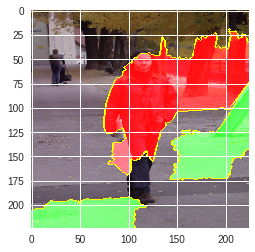

In [0]:
from skimage.segmentation import mark_boundaries
temp, mask = explanation.get_image_and_mask(0, positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

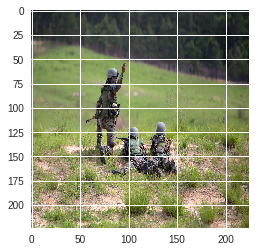

In [0]:
plt.imshow(X_train[200])